# Asteroid Hazard Classification

## Importing dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt
from graphviz import Source
from IPython.display import SVG

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import keras
import tensorflow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import joblib
from keras.models import save_model

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data_original = data.copy()

In [4]:
# For displaying all the columns
pd.set_option('display.max_columns', None)

In [5]:
data.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
0               0.079051               0.176763            417.388066   
1               0.090762               0.202951            479.225620   
2               0.143849               0.321655            759.521423   
3               0.005469               0.012229             28.876199   
4               0.079051               0.176763            417.388066   

   Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  \
0            933.308089          1995-01-01               788947200000   
1           1071.581063          1995-01-01               788947200000   
2           1698.341531          1995-01-08               789552000000   
3             64.569144          1995-01-15               790156800000   
4            933.308089          1995-01-15               790156800000   

   Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  \
0                      6.115834                 22017.003799    13680.509944   
1                     18.113985                 65210.346095    40519.173105   
2                      7.590711                 27326.560182    16979.661798   
3                     11.173874                 40225.948191    24994.839864   
4                      9.840831                 35426.991794    22012.954985   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                  0.419483         163.178711              62753692.0   
1                  0.383014         148.992630              57298148.0   
2                  0.050956          19.821890               7622911.5   
3                  0.285322         110.990387              42683616.0   
4                  0.407832         158.646713              61010824.0   

   Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  \
0         38993336.0         Earth        17      2017-04-06 08:36:37   
1         35603420.0         Earth        21      2017-04-06 08:32:49   
2          4736657.5         Earth        22      2017-04-06 09:20:19   
3         26522368.0         Earth         7      2017-04-06 09:15:49   
4         37910368.0         Earth        25      2017-04-06 08:57:58   

   Orbit Uncertainity  Minimum Orbit Intersection  \
0                   5                    0.025282   
1                   3                    0.186935   
2                   0                    0.043058   
3                   6                    0.005512   
4                   1                    0.034798   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                        4.634         2458000.5      0.425549   
1                        5.457         2458000.5      0.351674   
2                        4.557         2458000.5      0.348248   
3                        5.093         2458000.5      0.216578   
4                        5.154         2458000.5      0.210448   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0         1.407011     6.025981          314.373913      609.599786   
1         1.107776    28.412996          136.717242      425.869294   
2         1.4

### Dimensions of the dataset

In [6]:
data.shape

(4687, 40)

### Columns of the dataset

In [7]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

### Null values

In [8]:
def plot_null_values():
    null_values = data.isnull().sum()
    null_values_per = (data.isnull().sum()/data.shape[0])*100
    
    null_df = pd.DataFrame({
        'Total Null Values': null_values,
        '% of Null Values': null_values_per
    })
    return null_df

In [9]:
plot_null_values()

Total Null Values  % of Null Values
Neo Reference ID                              0               0.0
Name                                          0               0.0
Absolute Magnitude                            0               0.0
Est Dia in KM(min)                            0               0.0
Est Dia in KM(max)                            0               0.0
Est Dia in M(min)                             0               0.0
Est Dia in M(max)                             0               0.0
Est Dia in Miles(min)                         0               0.0
Est Dia in Miles(max)                         0               0.0
Est Dia in Feet(min)                          0               0.0
Est Dia in Feet(max)                          0               0.0
Close Approach Date                           0               0.0
Epoch Date Close Approach                     0               0.0
Relative Velocity km per sec                  0               0.0
Relative Velocity km per hr                   0               0.0
Miles per hour                                0               0.0
Miss Dist.(Astronomical)                      0               0.0
Miss Dist.(lunar)                             0               0.0
Miss Dist.(kilometers)                        0               0.0
Miss Dist.(miles)                             0               0.0
Orbiting Body                                 0               0.0
Orbit ID                                      0               0.0
Orbit Determination Date                      0               0.0
Orbit Uncertainity                            0               0.0
Minimum Orbit Intersection                    0               0.0
Jupiter Tisserand Invariant                   0               0.0
Epoch Osculation                              0               0.0
Eccentricity                                  0               0.0
Semi Major Axis                               0               0.0
Inclination                                   0               0.0
Asc Node Longitude                            0               0.0
Orbital Period                                0               0.0
Perihelion Distance                           0               0.0
Perihelion Arg                                0               0.0
Aphelion Dist                                 0               0.0
Perihelion Time                               0               0.0
Mean Anomaly                                  0               0.0
Mean Motion                                   0               0.0
Equinox                                       0               0.0
Hazardous                                     0               0.0

There are no null values in this dataset, Let's move on to prepare the data

In [10]:
data.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       Est Dia in Feet(max)  Epoch Date Close Approach  \
count           4687.000000               4.687000e+03   
mean            1501.013521               1.179881e+12   
std             2711.257465               1.981540e+11   
min                7.413530               7.889472e+11   
25%              245.485039               1.015574e+12   
50%              812.877364               1.203062e+12   
75%             1862.194459               1.355558e+12   
max           114294.420501               1.473318e+12   

       Relative Velocity km per sec  Relative Velocity km per hr  \
count                   4687.000000                  4687.000000   
mean                      13.970811                 50294.919829   
std                        7.293223                 26255.601377   
min                        0.335504                  1207.814804   
25%                        8.432865                 30358.313370   
50%                       12.917889                 46504.401181   
75%                       18.077649                 65079.535405   
max                       44.633747                160681.487851   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count     4687.000000               4687.000000        4687.000000   
mean     31251.307268                  0.256778          99.886706   
std      16314.209644                  0.145798          56.715493   
min        750.489149                  0.000178           0.069194   
25%      18863.475327                  0.133420          51.900211   
50%      28896.026390                  0.265029         103.096123   
75%      40437.892430                  0.384154         149.435921   
max      99841.227826                  0.499884         194.454910   

       Miss Dist.(kilometers)  Miss Dist.(miles)     Orbit ID  \
count            4.687000e+03       4.687000e+03  4687.000000   
mean             3.841347e+07       2.386902e+07    28.300619   
std              

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

## Data Preparation

In [12]:
data.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
0               0.079051               0.176763            417.388066   
1               0.090762               0.202951            479.225620   
2               0.143849               0.321655            759.521423   
3               0.005469               0.012229             28.876199   
4               0.079051               0.176763            417.388066   

   Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  \
0            933.308089          1995-01-01               788947200000   
1           1071.581063          1995-01-01               788947200000   
2           1698.341531          1995-01-08               789552000000   
3             64.569144          1995-01-15               790156800000   
4            933.308089          1995-01-15               790156800000   

   Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  \
0                      6.115834                 22017.003799    13680.509944   
1                     18.113985                 65210.346095    40519.173105   
2                      7.590711                 27326.560182    16979.661798   
3                     11.173874                 40225.948191    24994.839864   
4                      9.840831                 35426.991794    22012.954985   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                  0.419483         163.178711              62753692.0   
1                  0.383014         148.992630              57298148.0   
2                  0.050956          19.821890               7622911.5   
3                  0.285322         110.990387              42683616.0   
4                  0.407832         158.646713              61010824.0   

   Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  \
0         38993336.0         Earth        17      2017-04-06 08:36:37   
1         35603420.0         Earth        21      2017-04-06 08:32:49   
2          4736657.5         Earth        22      2017-04-06 09:20:19   
3         26522368.0         Earth         7      2017-04-06 09:15:49   
4         37910368.0         Earth        25      2017-04-06 08:57:58   

   Orbit Uncertainity  Minimum Orbit Intersection  \
0                   5                    0.025282   
1                   3                    0.186935   
2                   0                    0.043058   
3                   6                    0.005512   
4                   1                    0.034798   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                        4.634         2458000.5      0.425549   
1                        5.457         2458000.5      0.351674   
2                        4.557         2458000.5      0.348248   
3                        5.093         2458000.5      0.216578   
4                        5.154         2458000.5      0.210448   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0         1.407011     6.025981          314.373913      609.599786   
1         1.107776    28.412996          136.717242      425.869294   
2         1.4

### Identifying the categorical variables

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(f'Categorical Columns: {categorical_columns}')

Categorical Columns: Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')


In [14]:
# Converting data columns from object to DateTime type
data['Close Approach Date'] = pd.to_datetime(data['Close Approach Date'])
data['Orbit Determination Date'] = pd.to_datetime(data['Orbit Determination Date'])

In [15]:
data['Orbiting Body'].value_counts() 

Earth    4687
Name: Orbiting Body, dtype: int64

Since _Orbiting Body_ column has only one unique value, it's of no use to us hence, we'll drop this column.

In [16]:
data['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

Again, since _Equinox_ column has only one unique value, it's of no use to us hence, we'll drop this column.

In [17]:
columns_to_drop = ['Orbiting Body', 'Equinox']
data.drop(columns=columns_to_drop, inplace=True)

### Plotting the correlation heatmap

C:\Users\tapas\AppData\Local\Temp\ipykernel_18416\804391217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

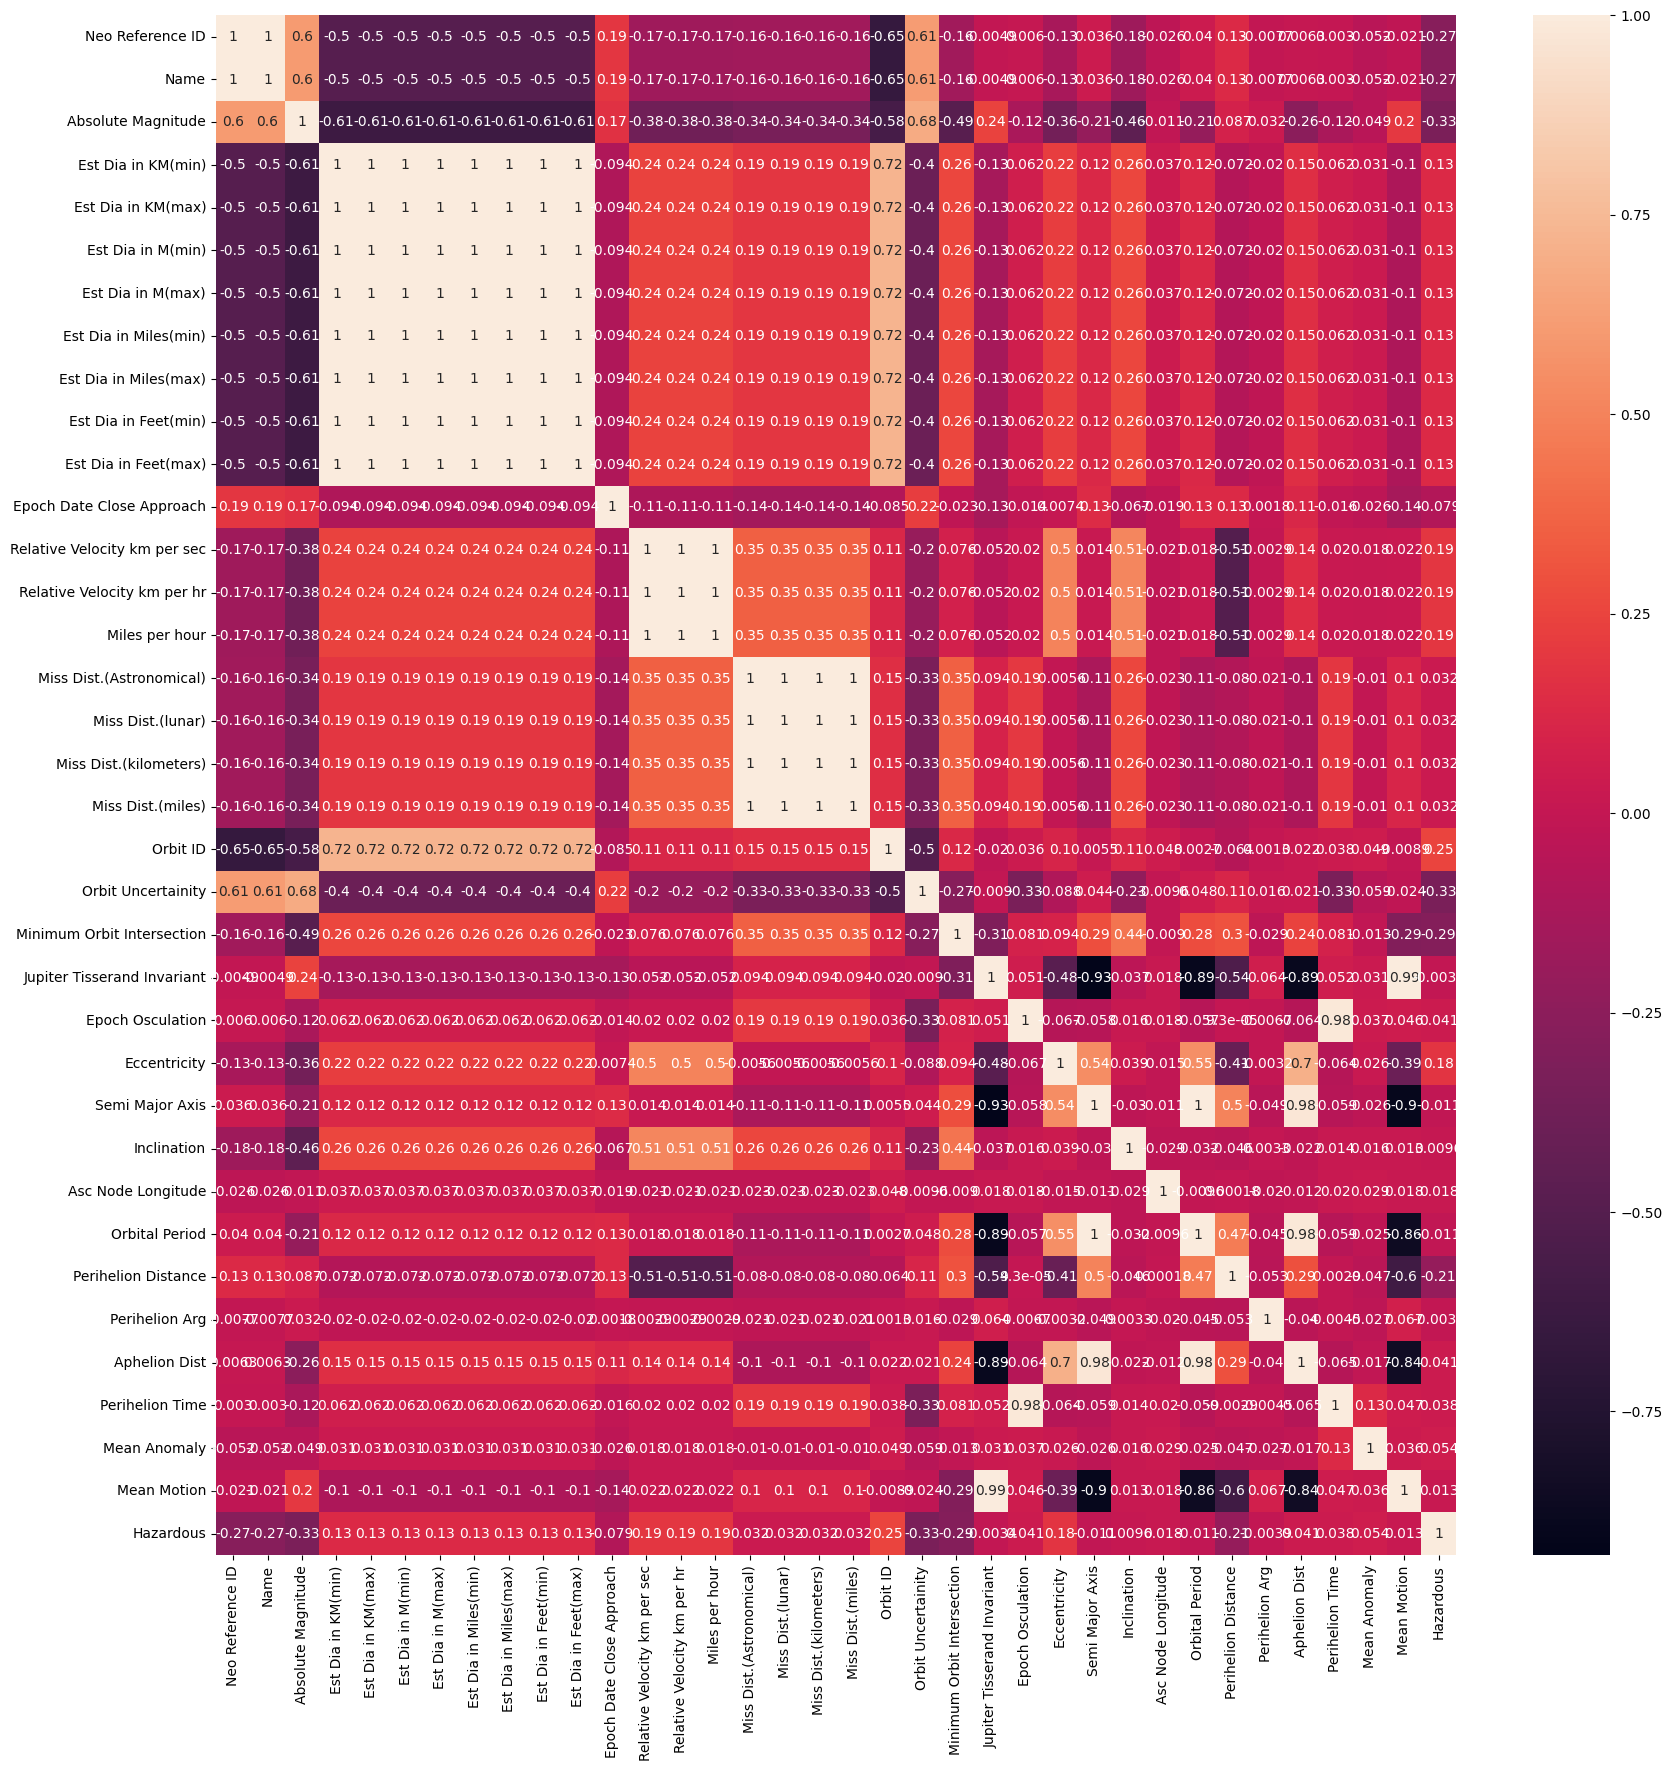

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot=True)

In the above heatmap some of the variables has the correlation of __1__ becaue those variables are similar just represented using different unit. So, let's remove those variables 

### Removing the columns which will not be used in the classification

In [19]:
# Printing all the column names
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

Following variables have similar importance <br>
1. 'Est Dia in KM(min & max)', 'Est Dia in M(min & max)', 'Est Dia in Miles(min & max)', 'Est Dia in Feet(min & max)'
2. 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour'
3. 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'

From the above variables, we can keep one from each of the categories rest we can drop

In [20]:
columns_to_drop = [
        'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
'Relative Velocity km per sec','Miles per hour',
'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)']

data.drop(columns=columns_to_drop, inplace=True)

In [21]:
# Before plotting the heatmap again, let's encode the 'Hazardous' column to numeric value
ohe = OneHotEncoder(sparse_output=False)
transformed = pd.DataFrame(ohe.fit_transform(data[['Hazardous']]), columns=ohe.get_feature_names_out())
data = pd.concat([data, transformed], axis=1)
data.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max) Close Approach Date  Epoch Date Close Approach  \
0            0.284472          1995-01-01               788947200000   
1            0.326618          1995-01-01               788947200000   
2            0.517654          1995-01-08               789552000000   
3            0.019681          1995-01-15               790156800000   
4            0.284472          1995-01-15               790156800000   

   Relative Velocity km per hr  Miss Dist.(kilometers)  Orbit ID  \
0                 22017.003799              62753692.0        17   
1                 65210.346095              57298148.0        21   
2                 27326.560182               7622911.5        22   
3                 40225.948191              42683616.0         7   
4                 35426.991794              61010824.0        25   

  Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  \
0      2017-04-06 08:36:37                   5                    0.025282   
1      2017-04-06 08:32:49                   3                    0.186935   
2      2017-04-06 09:20:19                   0                    0.043058   
3      2017-04-06 09:15:49                   6                    0.005512   
4      2017-04-06 08:57:58                   1                    0.034798   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                        4.634         2458000.5      0.425549   
1                        5.457         2458000.5      0.351674   
2                        4.557         2458000.5      0.348248   
3                        5.093         2458000.5      0.216578   
4                        5.154         2458000.5      0.210448   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0         1.407011     6.025981          314.373913      609.599786   
1         1.107776    28.412996          136.717242      425.869294   
2         1.458824     4.237961          259.475979      643.580228   
3         1.255903     7.905894           57.173266      514.082140   
4         1.225615    16.793382           84.629307      495.597821   

   Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0             0.808259       57.257470       2.005764     2.458162e+06   
1             0.718200      313.091975       1.497352     2.457795e+06   
2             0.950791      248.415038       1.966857     2.458120e+06   
3             0.983902       18.707701       1.527904     2.457902e+06   
4             0.967687      158.263596       1.483543     2.457814e+06   

   Mean Anomaly  Mean Motion  Hazardous  Hazardous_False  Hazardous_True  
0    264.837533     0.590551       True              0.0             1.0  
1    173.741112     0.845330      False              1.0             0.0  
2    292.893654     0.559371       True              0.0             1.0  
3     68.741007     0.700277      False              1.0             0.0  
4    135.142133     0.726395       True              0.0             1.0

In [22]:
#dropping Hazardous and Hazardous_False columns
data = data.drop(columns=['Hazardous', 'Hazardous_False']).rename(columns={'Hazardous_True':'Hazardous'})

In [23]:
# We can also drop the name and Neo Reference ID, Orbit ID as it has no significance in classifying
data.drop(columns=['Neo Reference ID', 'Name', 'Orbit ID'], inplace=True)

C:\Users\tapas\AppData\Local\Temp\ipykernel_18416\1448494614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

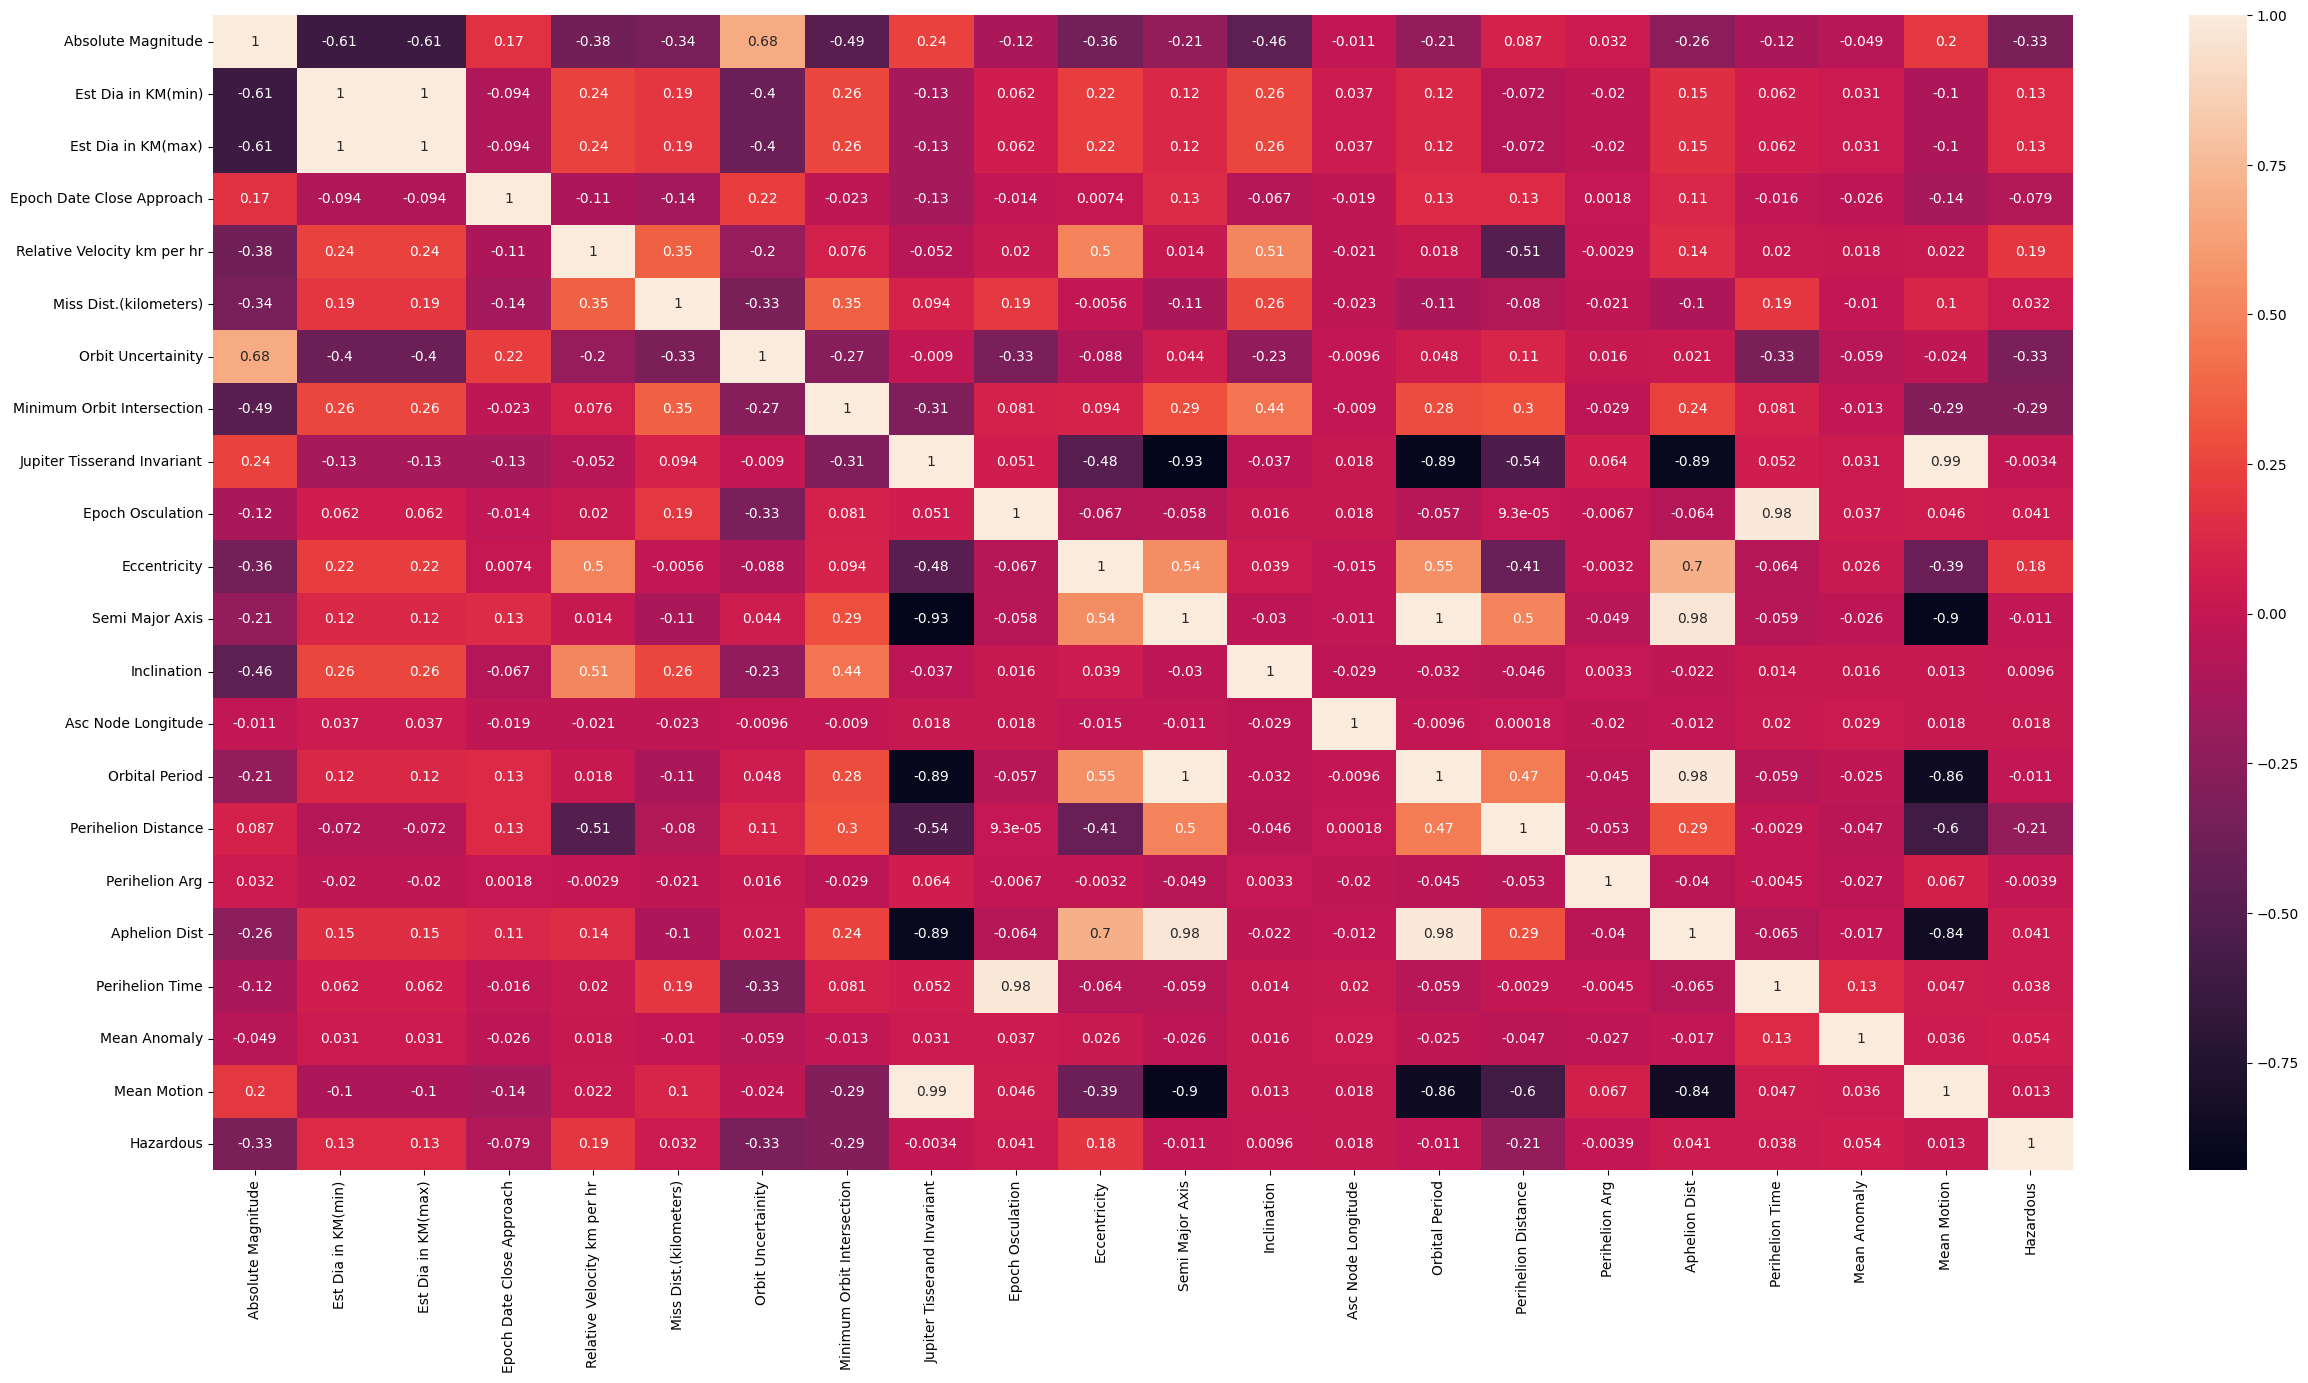

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True)

### Box Plotting: Detecting outliers

In [25]:
# Preparing X & Y variabels
X = data.drop(columns=['Hazardous'])
Y = data.Hazardous

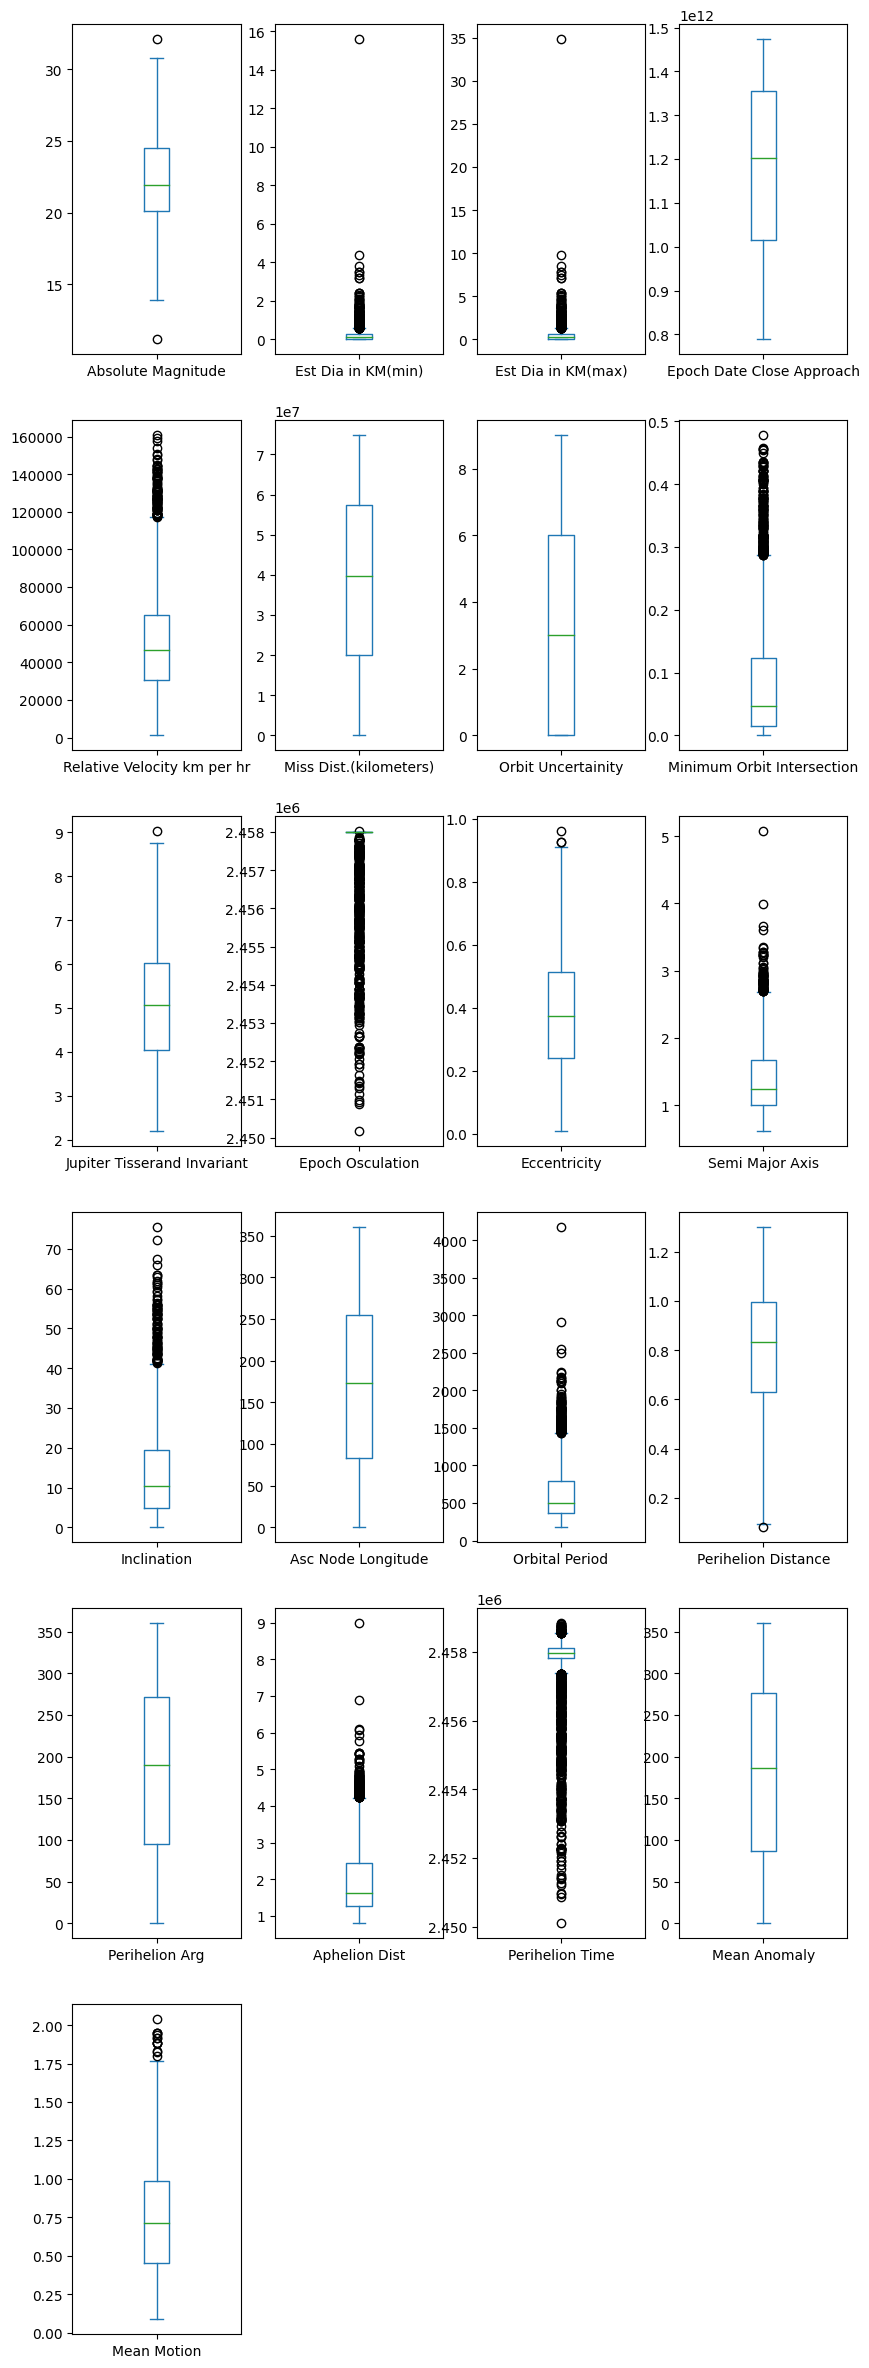

In [26]:
_ = X.plot(kind='box', subplots=True, layout=(6,4), sharex=False, figsize=(10, 30))

### Visualizing outliers through scatterplot

In [27]:
def get_outliers_using_zscore(column, threshold=3):
    z = np.abs(stats.zscore(X[column]))
    outliers = X[z > threshold]
    return outliers

def get_outliers_using_iqr(column, threshold=1.5):
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = X[(X[column] < (Q1 - threshold * IQR)) | (X[column] > (Q1 + threshold * IQR))]
    return outliers

In [28]:
def plot_outliers(columns=[], method='zscore'):
    rows = 5
    cols = 3
    f, ax = plt.subplots(rows, cols, figsize=(20,30))
    for i in range(rows):
        for j in range(cols):
            col = i+j
            outliers = method == get_outliers_using_zscore(columns[col]) if method == 'zscore' else get_outliers_using_iqr(columns[col])
            df_red = outliers[columns[col]].copy()
            sns.scatterplot(x=X[columns[col]].index, y=X[columns[col]].values, ax=ax[i, j])
            sns.scatterplot(x=df_red.index, y=df_red.values, c='red', ax=ax[i, j], marker='X')
            ax[i, j].set_xlabel(columns[col])
    
    plt.show()

In [29]:
columns_having_outliers = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
                          'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
                            'Semi Major Axis', 'Inclination', 'Orbital Period', 'Perihelion Distance', 'Aphelion Dist',
                           'Perihelion Time', 'Mean Motion']

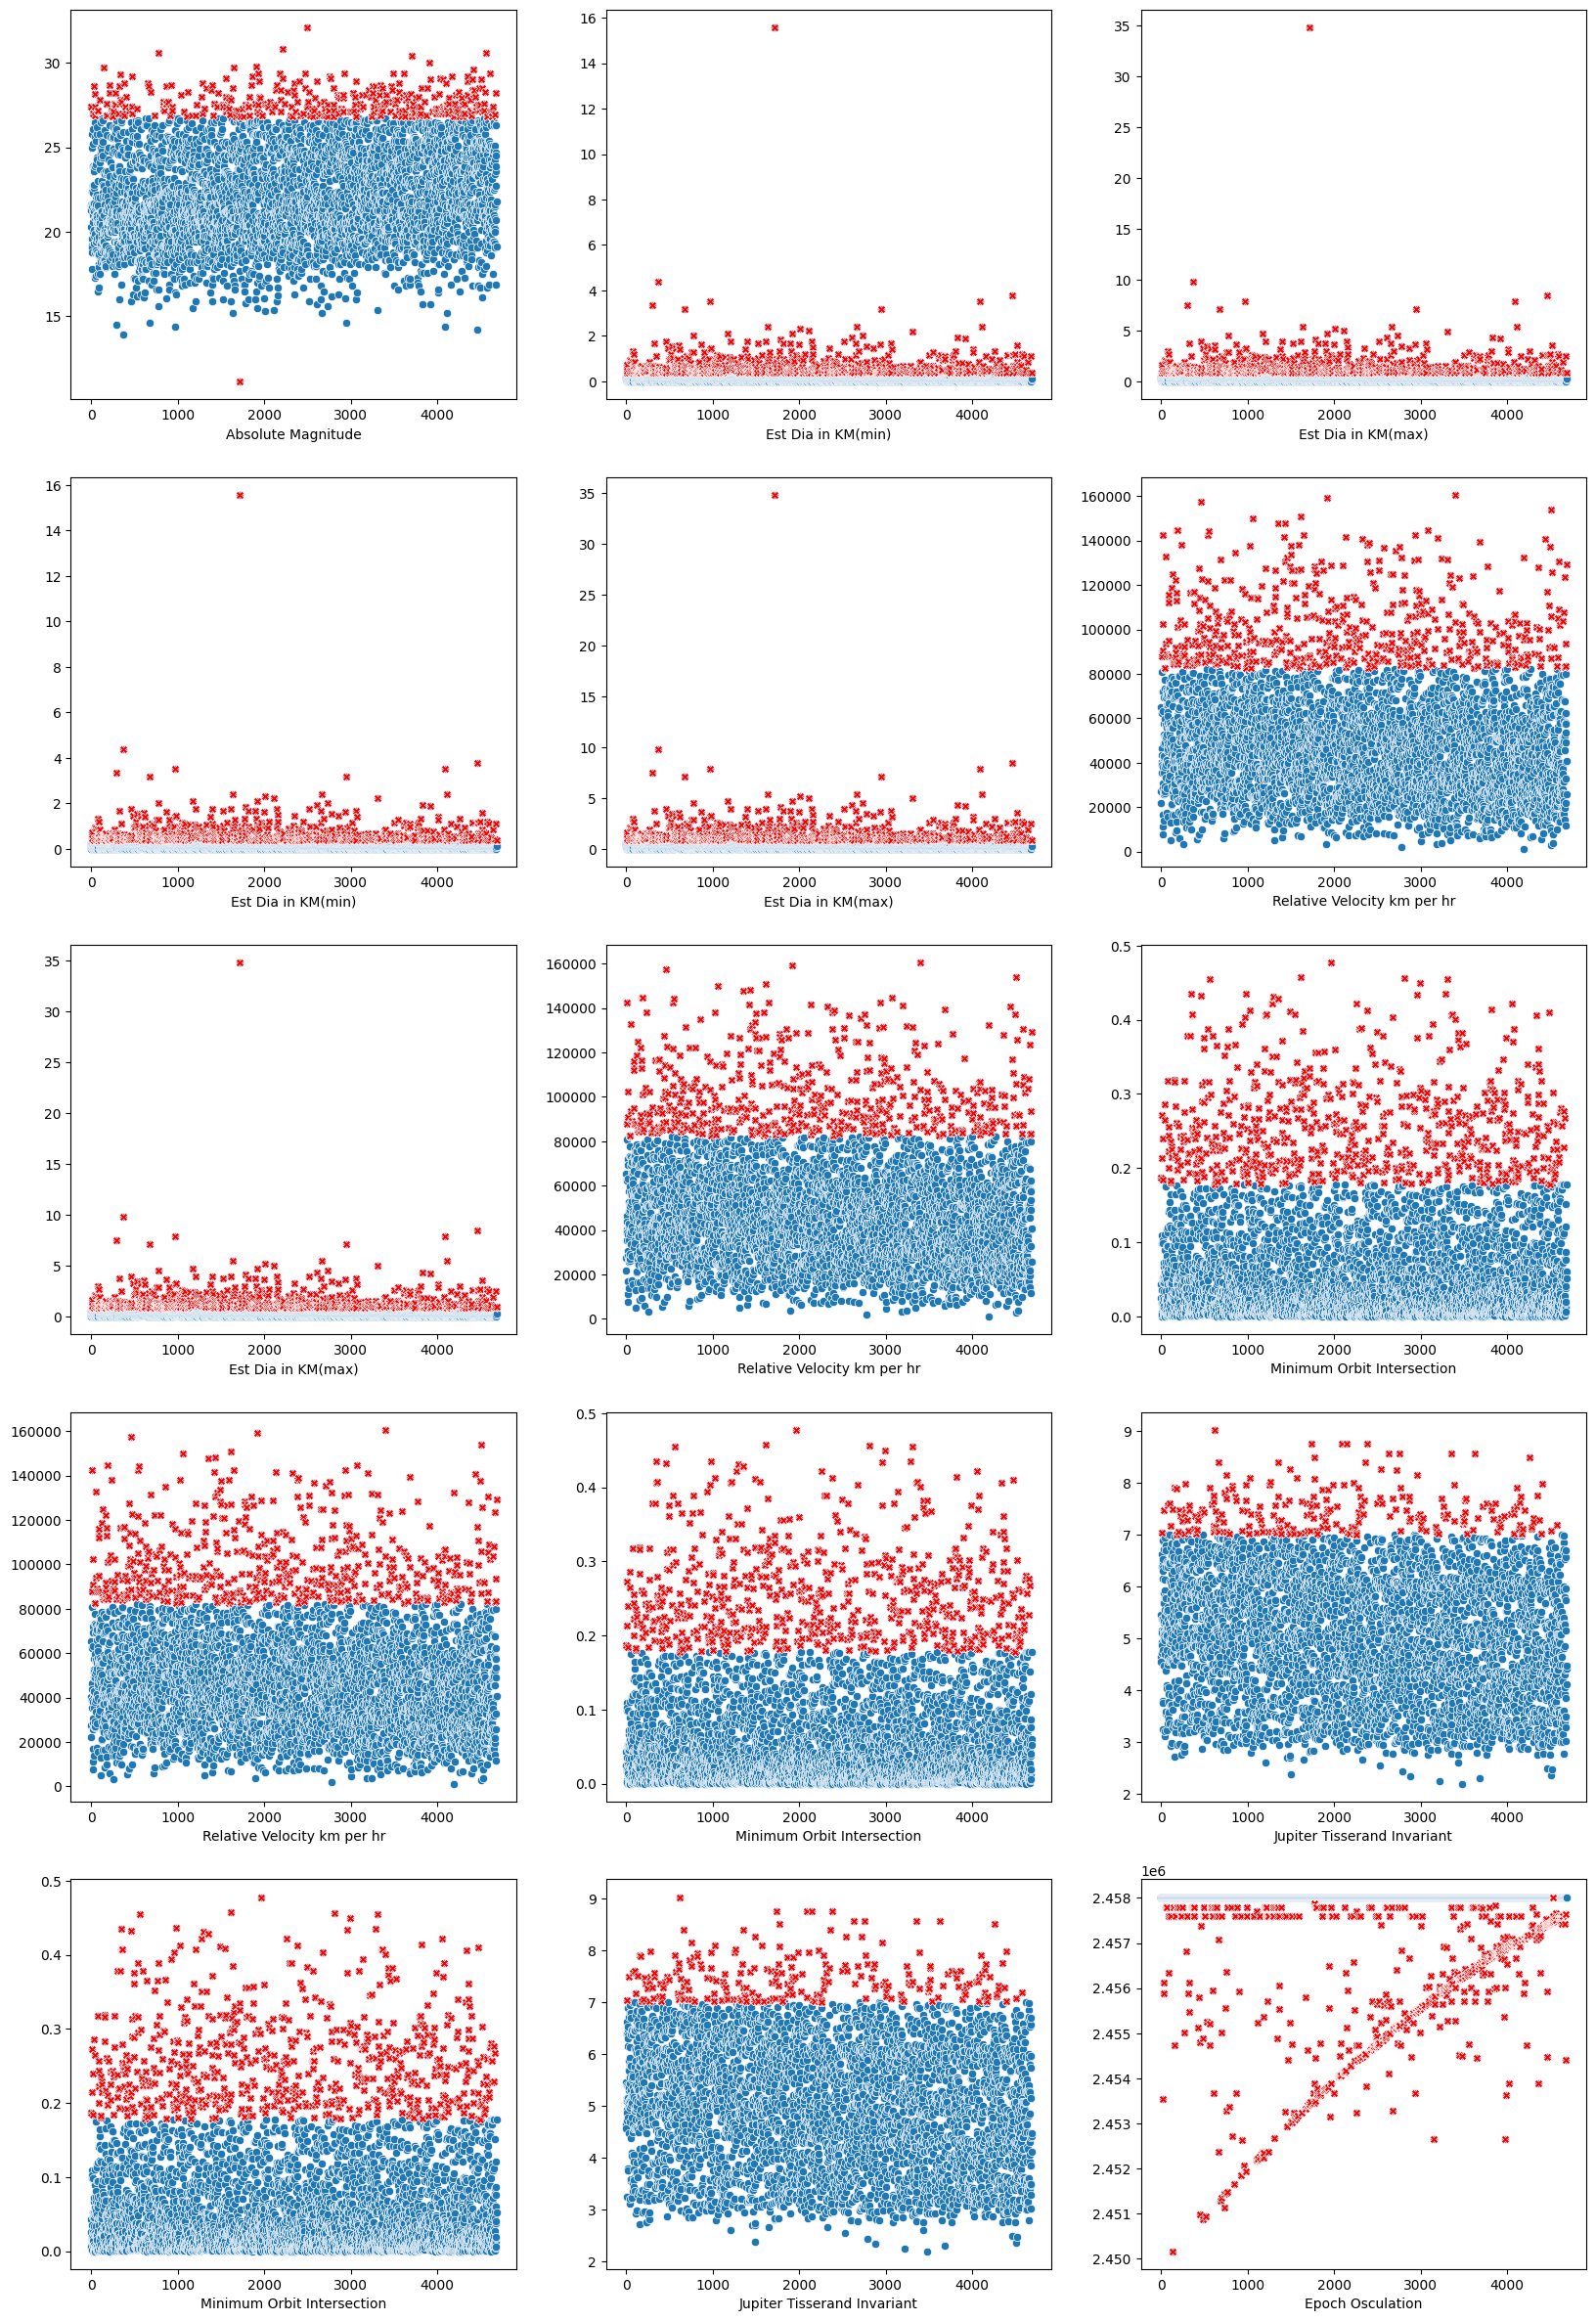

In [30]:
plot_outliers(columns_having_outliers, method='iqr')

### Removing Outliers

In [31]:
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def remove_outliers_all(df, col_list):
    for c in col_list:
        df = remove_outliers(df,c)
    return df

In [32]:
    numerical_col = X.select_dtypes(include=np.number).columns.tolist()
    X = remove_outliers_all(X,numerical_col)

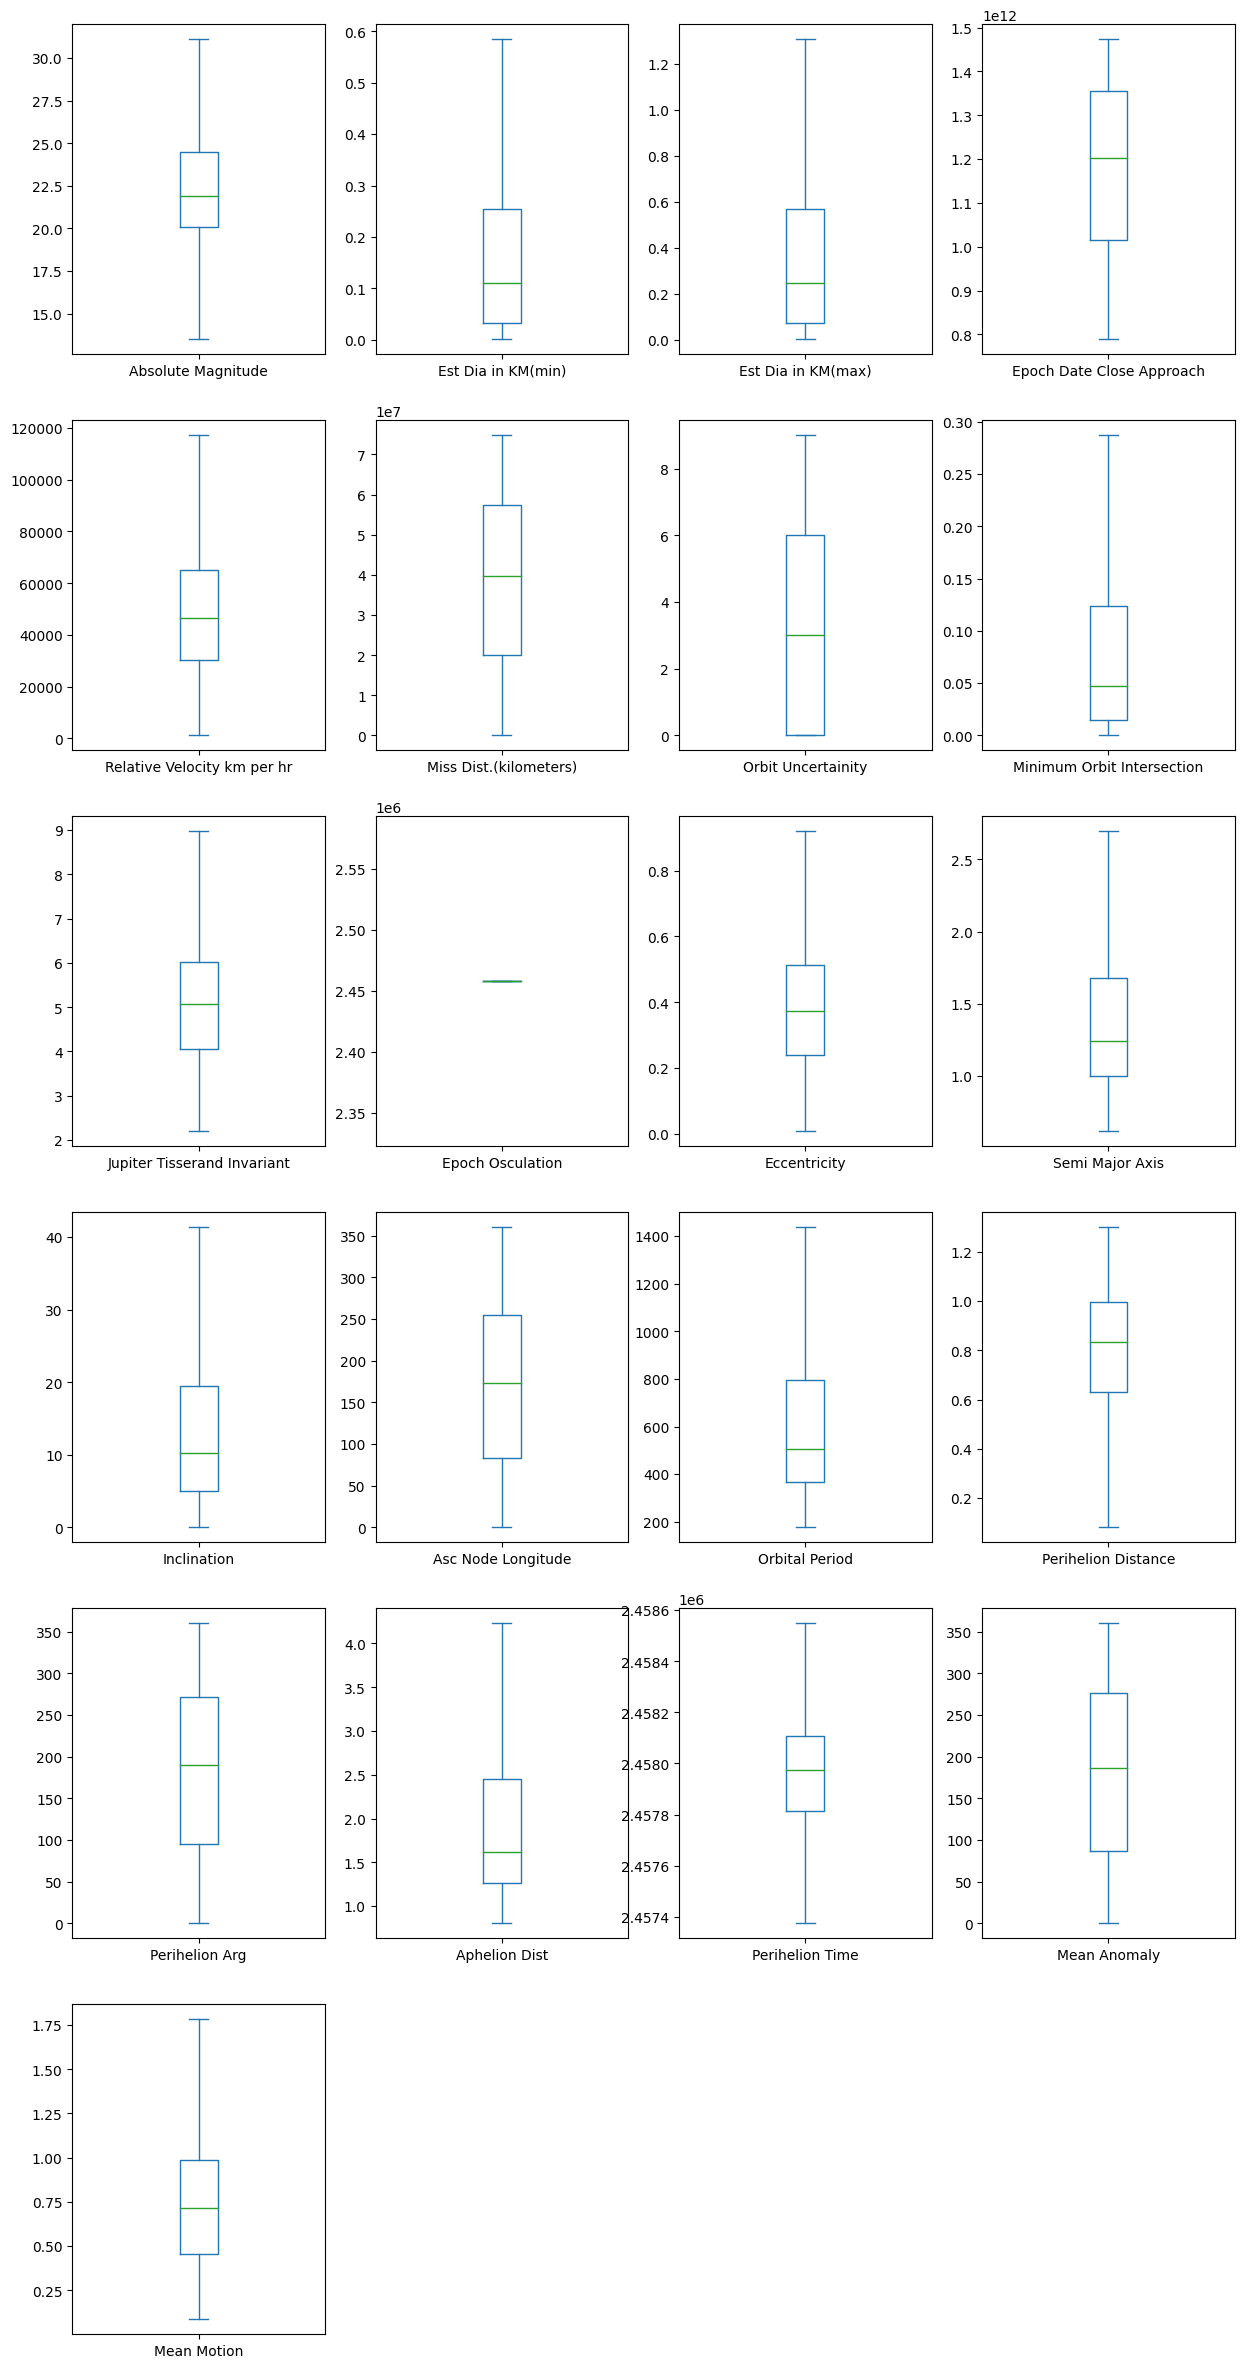

In [33]:
_ = X.plot(kind='box', subplots=True, layout=(6,4), sharex=False, figsize=(15, 30))

## Skewness

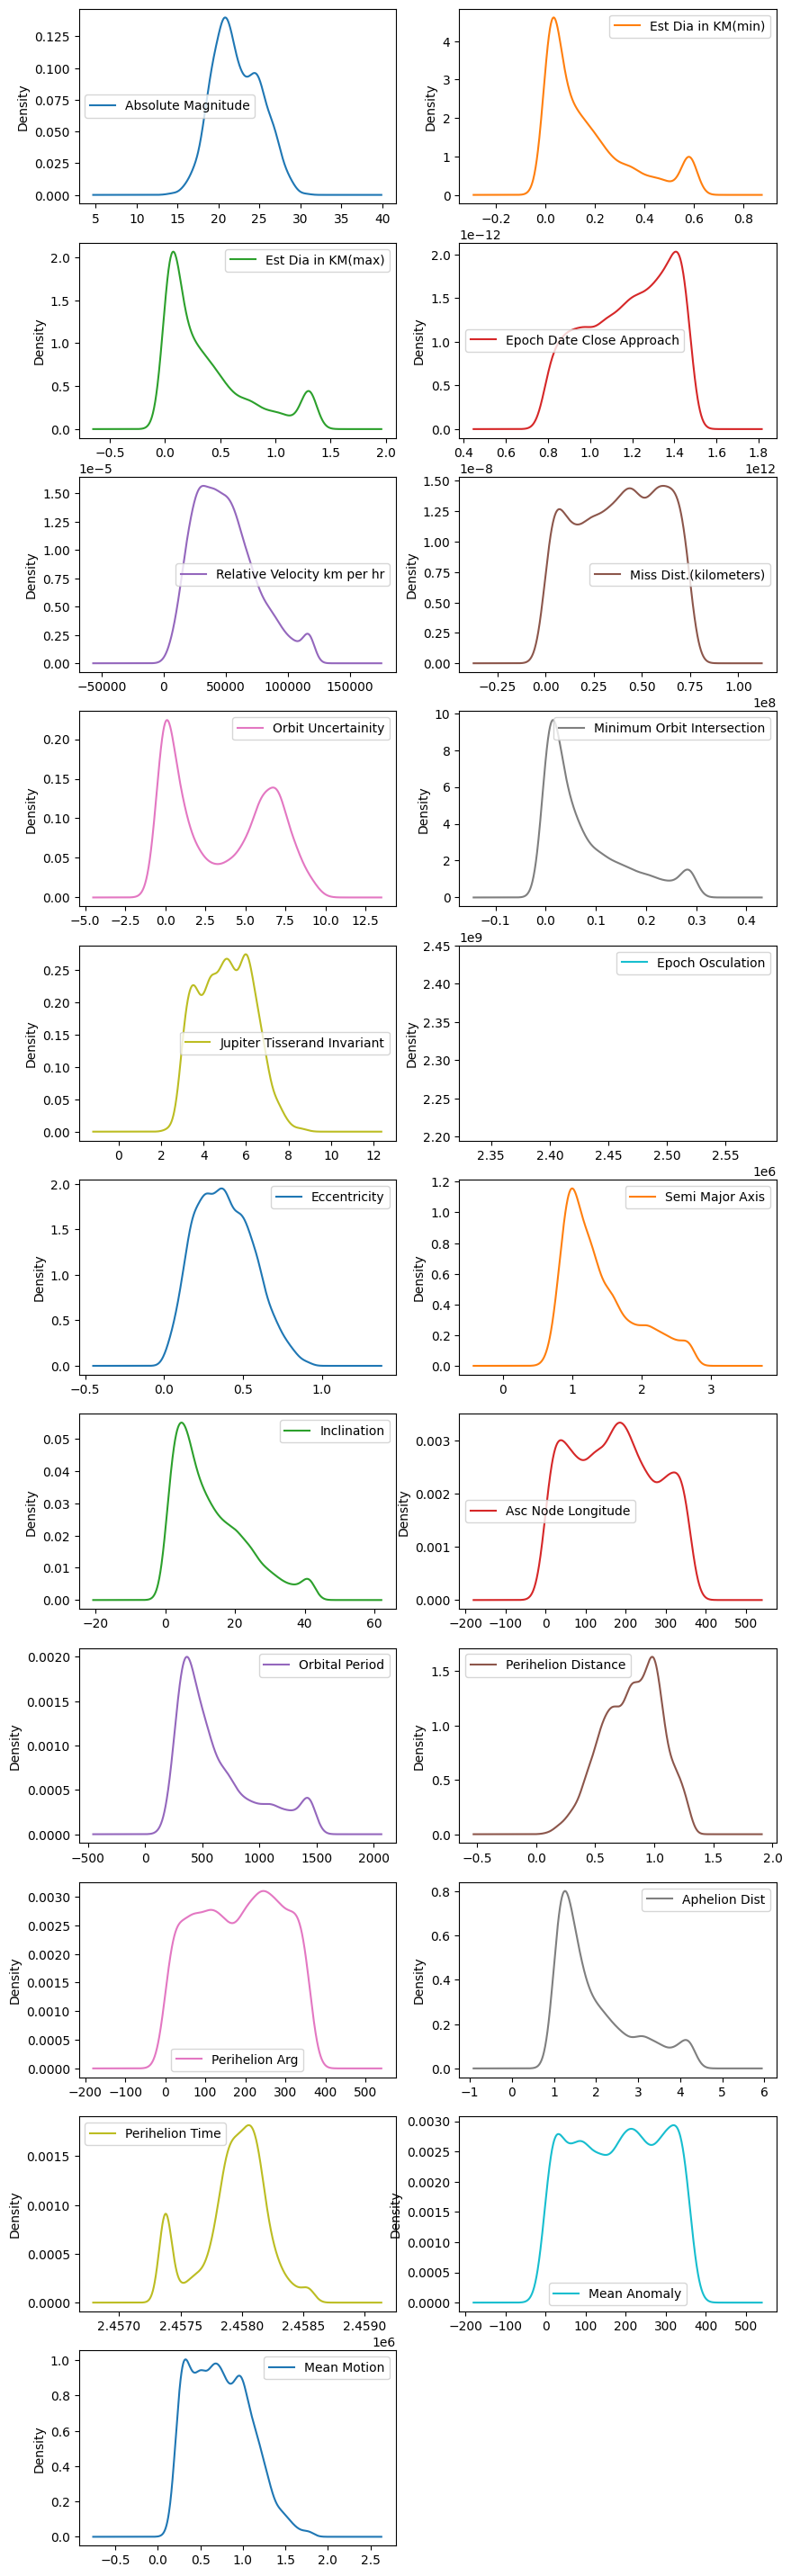

In [34]:
_ = X[numerical_col].plot(kind='density', subplots=True, layout=(12, 2), sharex=False, figsize=(10, 40))

#### Est Dia in KM(min) & Est Dia in KM(max)

Est Dia in KM(min) skewness before: 1.163280088795182
Est Dia in KM(min) Skewness after: -0.38831918367636453

Est Dia in KM(max) skewness before: 1.163280088601208
Est Dia in KM(max) skewness after: -0.38831918340928934


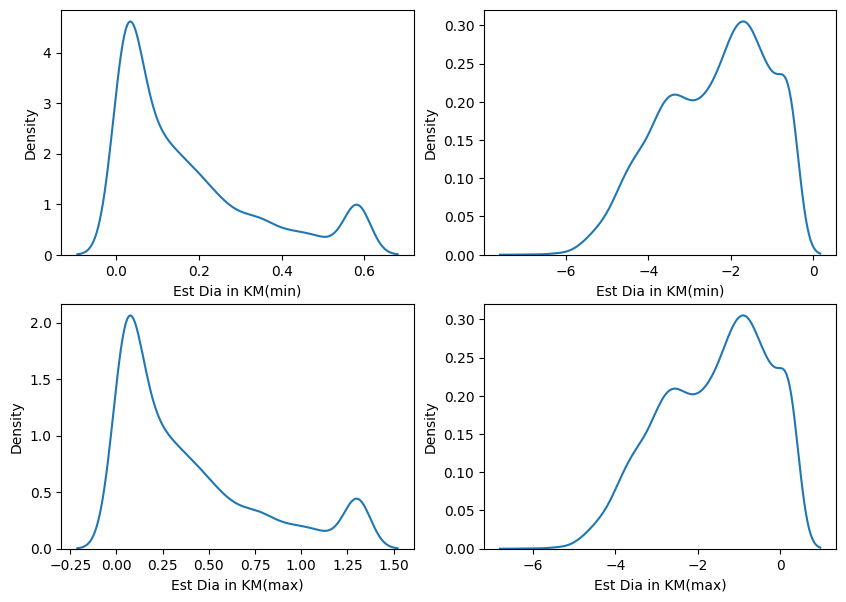

In [35]:
f, ax = plt.subplots(2,2, figsize=(10,7))
sns.kdeplot(data=X['Est Dia in KM(min)'], ax=ax[0,0])
sns.kdeplot(data=np.log(X['Est Dia in KM(min)']), ax=ax[0,1])
sns.kdeplot(data=X['Est Dia in KM(max)'], ax=ax[1,0])
sns.kdeplot(data=np.log(X['Est Dia in KM(max)']), ax=ax[1,1])

print('Est Dia in KM(min) skewness before: {}'.format((X['Est Dia in KM(min)'].skew())))
X['Est Dia in KM(min)'] = np.log(X['Est Dia in KM(min)'])
print('Est Dia in KM(min) Skewness after: {}'.format(X['Est Dia in KM(min)'].skew()))

print('\nEst Dia in KM(max) skewness before: {}'.format(X['Est Dia in KM(max)'].skew()))
X['Est Dia in KM(max)'] = np.log(X['Est Dia in KM(max)'])
print('Est Dia in KM(max) skewness after: {}'.format(X['Est Dia in KM(max)'].skew()))

#### Minimum Orbit Intersection

Minimum Orbit Intersection skewness before: 1.1477309463959624
Minimum Orbit Intersection Skewness after: -1.114641485848336


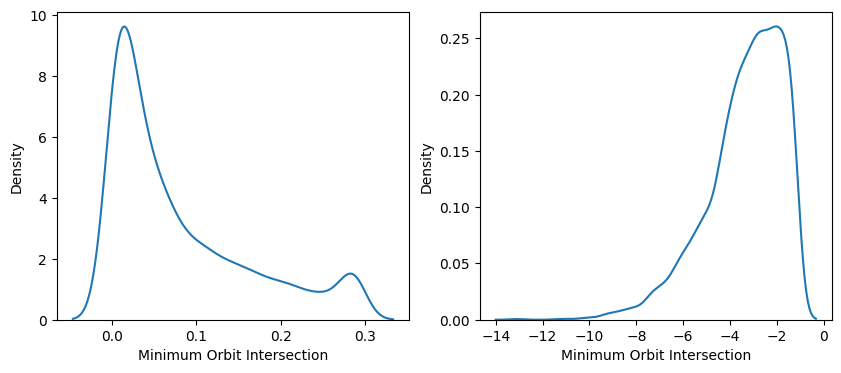

In [36]:
f, ax = plt.subplots(1,2, figsize=(10,4))
sns.kdeplot(data=X['Minimum Orbit Intersection'], ax=ax[0])
sns.kdeplot(data=np.log(X['Minimum Orbit Intersection']), ax=ax[1])

print('Minimum Orbit Intersection skewness before: {}'.format((X['Minimum Orbit Intersection'].skew())))
print('Minimum Orbit Intersection Skewness after: {}'.format(np.log(X['Minimum Orbit Intersection']).skew()))

Applying Log Transformation didn't improve the skewness. So, we will try to apply sqrt transformation

Minimum Orbit Intersection skewness before: 1.1477309463959624
Minimum Orbit Intersection Skewness after: 0.4289907326069241


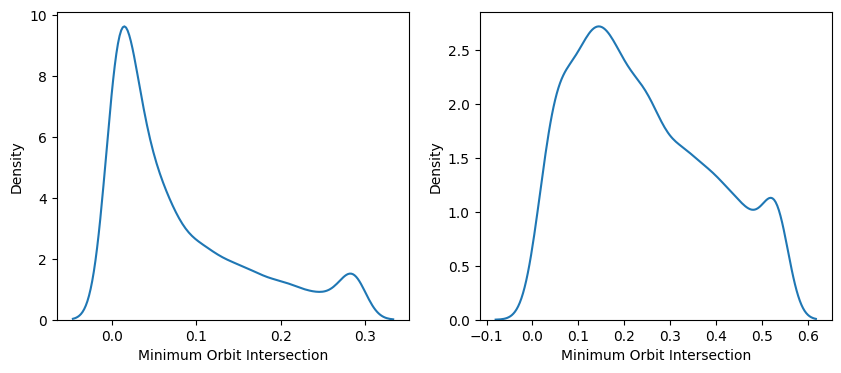

In [37]:
f, ax = plt.subplots(1,2, figsize=(10,4))
sns.kdeplot(data=X['Minimum Orbit Intersection'], ax=ax[0])
sns.kdeplot(data=np.sqrt(X['Minimum Orbit Intersection']), ax=ax[1])

print('Minimum Orbit Intersection skewness before: {}'.format(X['Minimum Orbit Intersection'].skew()))
X['Minimum Orbit Intersection'] = np.sqrt(X['Minimum Orbit Intersection'])
print('Minimum Orbit Intersection Skewness after: {}'.format(X['Minimum Orbit Intersection'].skew()))

#### Inclination

Inclination skewness before: 0.9662777882118367
Inclination Skewness after: 0.9662777882118367


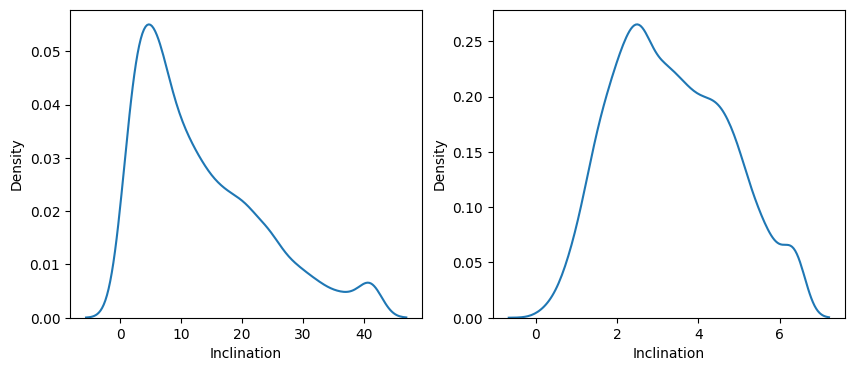

In [38]:
f, ax = plt.subplots(1,2, figsize=(10,4))
sns.kdeplot(data=X['Inclination'], ax=ax[0])
sns.kdeplot(data=np.sqrt(X['Inclination']), ax=ax[1])

print('Inclination skewness before: {}'.format(X['Inclination'].skew()))
X['Minimum Orbit Intersection'] = np.sqrt(X['Minimum Orbit Intersection'])
print('Inclination Skewness after: {}'.format(X['Inclination'].skew()))

In [39]:
cleaned_X = X.copy()

## Resolving Class Imbalance

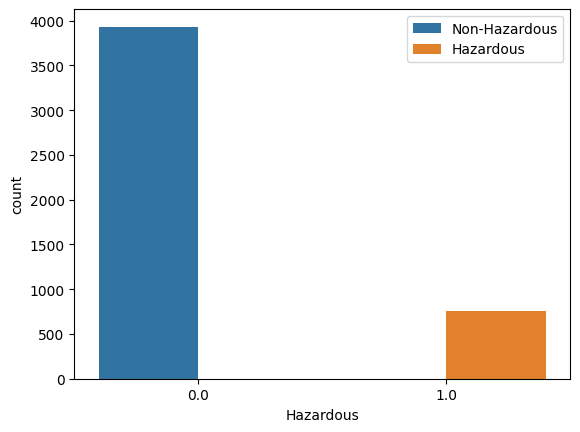

In [40]:
sns.countplot(data=data, x='Hazardous', hue='Hazardous')
plt.legend(labels=['Non-Hazardous','Hazardous'])

In [41]:
smt = SMOTE()
X_res, y_res = smt.fit_resample(X[X.select_dtypes(include=np.number).columns.tolist()],Y)

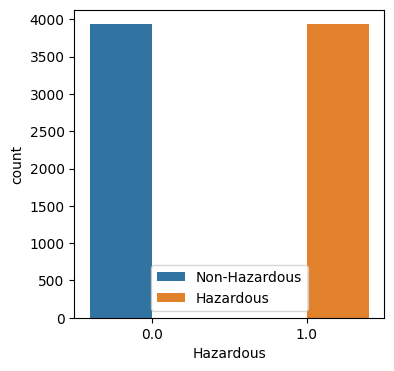

In [42]:
temp = pd.concat([X_res, y_res], axis=1)
plt.figure(figsize=(4, 4))
sns.countplot(data=temp, x='Hazardous', hue='Hazardous')
plt.legend(labels=['Non-Hazardous', 'Hazardous'], loc='lower center')

## Transformation

In [43]:
scalar = StandardScaler()
normalized_features = scalar.fit_transform(X_res)

In [44]:
temp = pd.DataFrame(normalized_features, columns=X.select_dtypes(include=np.number).columns.tolist())

## Splitting Training and Testing Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y_res, test_size=0.2, random_state=42)

In [46]:
print(f"Training Set Size => TrainX: {X_train.shape[0]}, TrainY: {y_train.shape[0]}")
print(f"Testing Set Size => TestX: {X_test.shape[0]}, TestY: {y_test.shape[0]}")

Training Set Size => TrainX: 6291, TrainY: 6291
Testing Set Size => TestX: 1573, TestY: 1573


## Machine Learning Models

### Decision Tree classification

In [47]:
def get_scores(model, forNN=False, getDF=False):
    '''Function to Get all the accuracy metrics of on testing dataset'''
    YPred = model.predict(X_test)
    
    if(forNN):
        accracy = accuracy_score(y_test, np.round(YPred))
        recall = recall_score(y_test, np.round(YPred))
        precision = precision_score(y_test, np.round(YPred))
        f1 = f1_score(y_test, np.round(YPred))
    else:
        accracy = model.score(X_test, y_test)
        recall = recall_score(y_test, YPred)
        precision = precision_score(y_test, YPred)
        f1 = f1_score(y_test, YPred)
        
    if getDF:
        d = {'accuracy':accracy, 'recall':recall, 'precision':precision, 'f1': f1}
        if forNN:
            return pd.DataFrame(data=d, index=['Neural Network'])
        else:
            return pd.DataFrame(data=d, index=['Decision Tree'])
        
    else:
        print(f'Accuracy: {accracy}')
        print(f'Recall Score: {recall}')
        print(f'Precision Score: {precision}')
        print(f'f1 Score: {f1}')
    

In [48]:
def plot_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''Function to plot confusion matrix'''
    y_predict = model.predict(X_test)
    cm=confusion_matrix( y_actual, np.round(y_predict), labels=[0, 1])
    
    labels = ['Actual - No', 'Actual - Yes'];
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:.2%}".format(value) for value in (cm.flatten()/np.sum(cm))]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(df_cm, annot=labels, cmap='crest', fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
def export_tree_to_image(model, name, view=False):
    graph = Source(tree.export_graphviz(model,filled=True, out_file=None, feature_names=X.select_dtypes(include=np.number).columns.tolist()))
    graph.format = 'png'
    graph.render(name,view=view)

### Decision Tree Without Pruning

In [50]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42, )
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Model Scores and Confusion Matrix

Accuracy: 0.9987285441830897
Recall Score: 0.9987046632124352
Precision Score: 0.9987046632124352
f1 Score: 0.9987046632124352


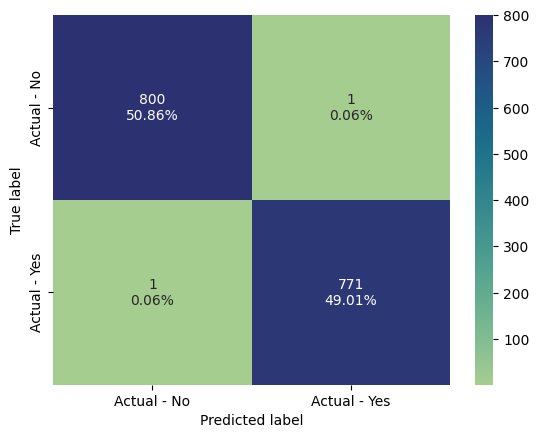

In [51]:
get_scores(dtree)
plot_confusion_matrix(dtree, y_test)

In [52]:
export_tree_to_image(dtree, 'tree_before_pruning')

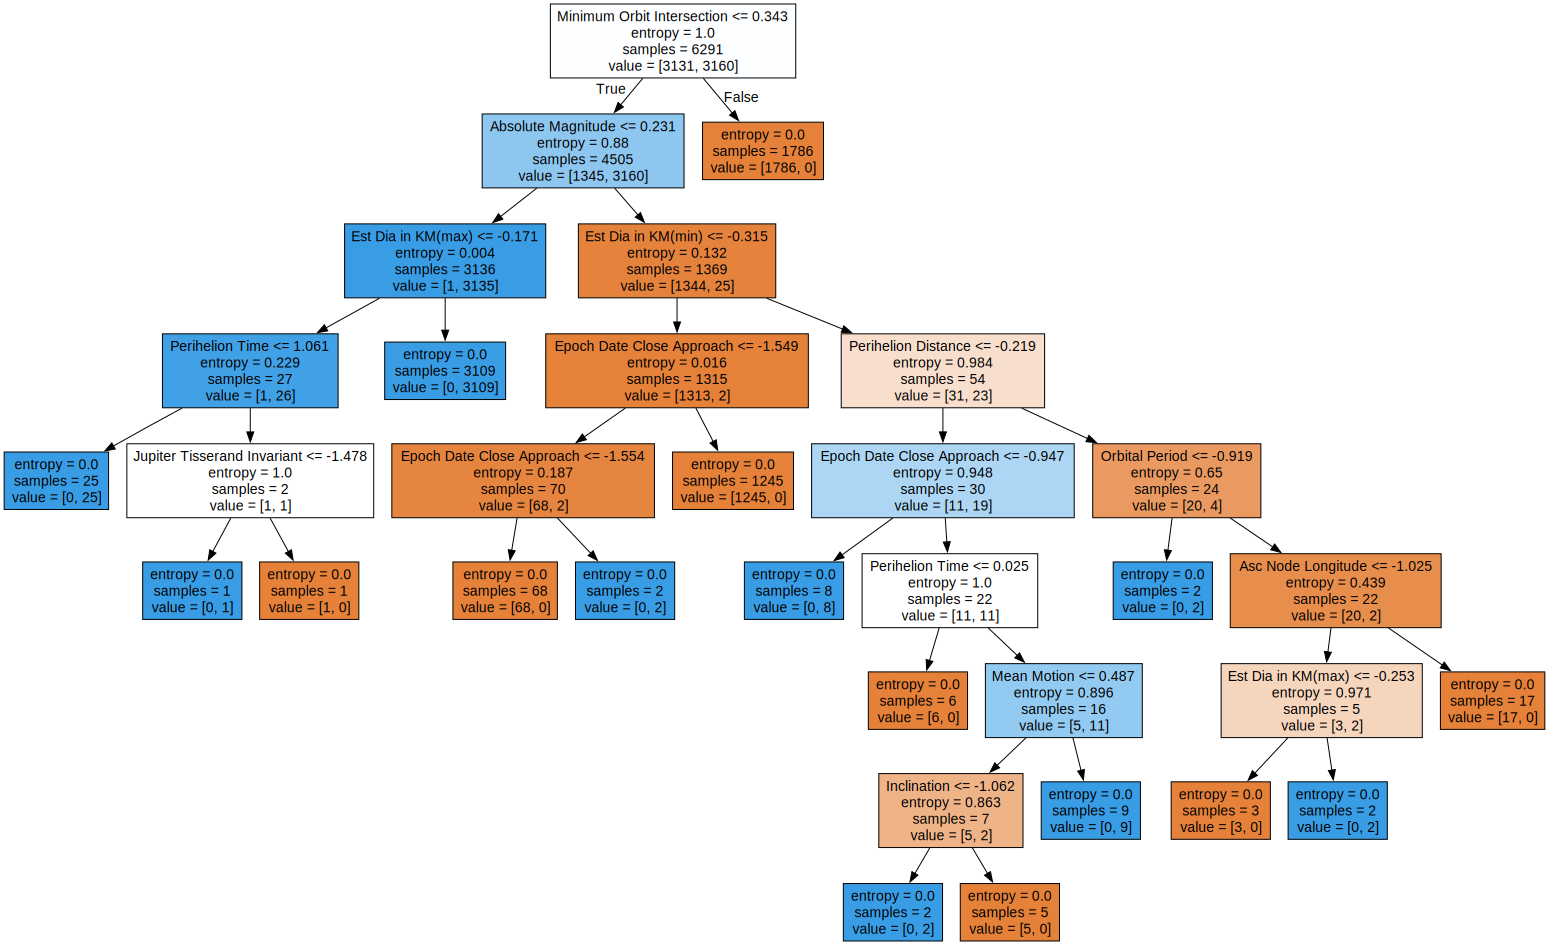

In [53]:
graph = Source(tree.export_graphviz(dtree, filled=True, feature_names=X.select_dtypes(include=np.number).columns.tolist()))
SVG(graph.pipe(format='svg'))

### Decision Tree with pruning with RandomizedSearchCV 

In [54]:
parameters = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'max_features': range(4,22),
    'criterion':['entropy', 'gini']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    cv=5, n_jobs=-1, verbose=True
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters for DecisionTree: {best_params}")

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best Parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19}


In [55]:
dtree_best = grid_search.best_estimator_
dtree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=19)

Accuracy: 0.996185632549269
Recall Score: 0.9961139896373057
Precision Score: 0.9961139896373057
f1 Score: 0.9961139896373057


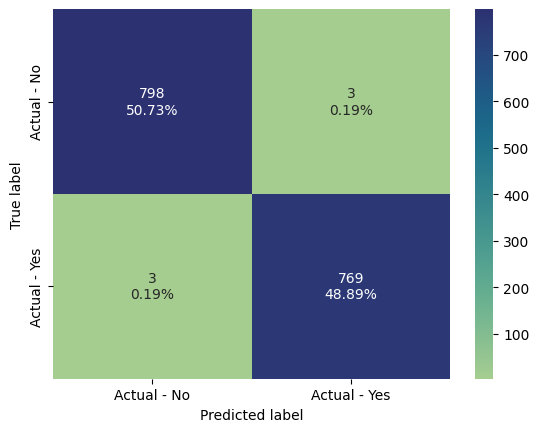

In [56]:
get_scores(dtree_best)
plot_confusion_matrix(dtree_best, y_test)

In [57]:
export_tree_to_image(dtree_best, 'tree_after_pruning')

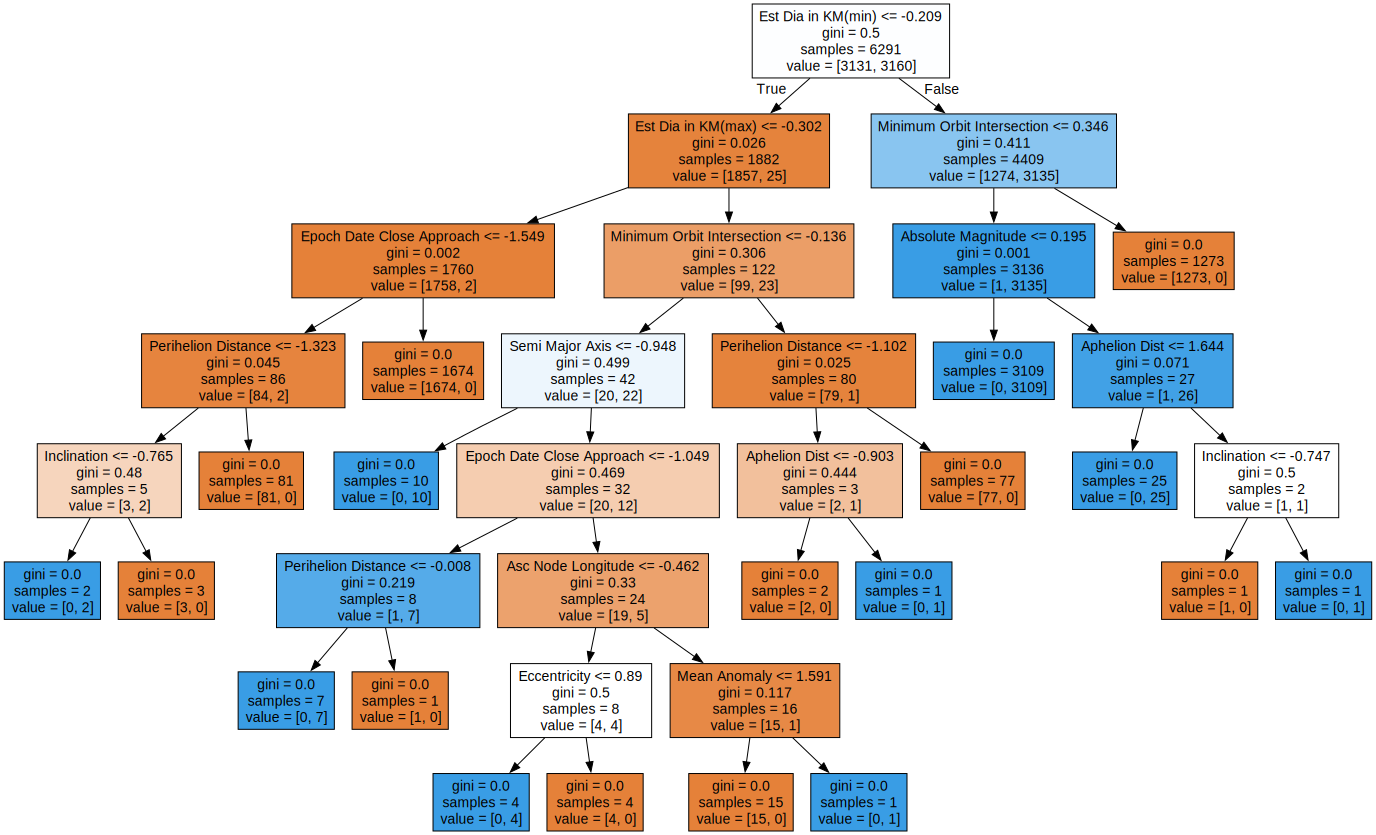

In [58]:
graph = Source(tree.export_graphviz(dtree_best, filled=True, feature_names=X.select_dtypes(include=np.number).columns.tolist()))
SVG(graph.pipe(format='svg'))

## Neural Network

In [59]:
Yr_train = to_categorical(y_train, 2)
Yr_test = to_categorical(y_test, 2)

In [60]:
nn_model = Sequential()
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(5, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, batch_size=16, verbose=1, use_multiprocessing=True, epochs=35)



Epoch 1/35


394/394 [==============================] - 3s 3ms/step - loss: 0.5219 - accuracy: 0.7523
Epoch 2/35
394/394 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.9119
Epoch 3/35
394/394 [==============================] - 1s 3ms/step - loss: 0.1179 - accuracy: 0.9601
Epoch 4/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9733
Epoch 5/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9832
Epoch 6/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 7/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 8/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9911
Epoch 9/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9925
Epoch 10/35
394/394 [==============================] - 1s 3ms/step - loss: 0.0232 - accuracy: 0.

<Axes: xlabel='Epochs'>

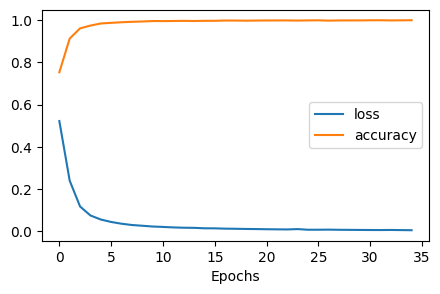

In [61]:
loss_acc = pd.DataFrame(nn_model.history.history)
loss_acc[['loss', 'accuracy']].plot(figsize=(5,3), xlabel='Epochs')

50/50 [==============================] - 0s 2ms/step


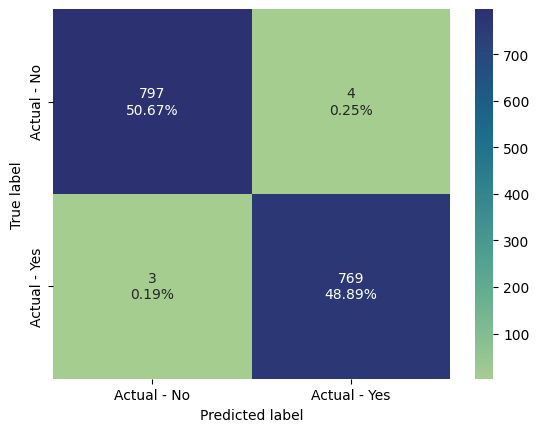

In [62]:
plot_confusion_matrix(nn_model, y_test)

In [63]:
get_scores(nn_model, forNN=True)

50/50 [==============================] - 0s 2ms/step
Accuracy: 0.9955499046408137
Recall Score: 0.9961139896373057
Precision Score: 0.9948253557567918
f1 Score: 0.9954692556634305


## Model Comparison

In [64]:
comparison_df = pd.concat([get_scores(dtree_best, getDF=True), get_scores(nn_model, forNN=True, getDF=True)], axis=0)

50/50 [==============================] - 0s 2ms/step


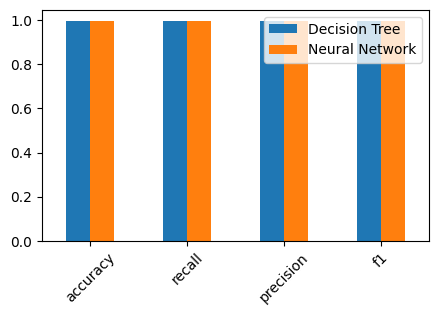

In [65]:
comparison_df.T.plot(kind='bar', figsize=(5,3))
_ = plt.xticks(rotation=45)

## Saving Model

In [66]:
# Save decision tree model
joblib.dump(dtree_best, 'models/asteroid_hazard-decision_tree_model.pkl')

# Save neural network model
save_model(nn_model, 'models/asteroid_hazard-neural_network_model.keras')

### Reference
1. For visualization of outliers: [Detect and Remove Outliers using Python by Aman Kharwal](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)
2. For hyperparameter tuning [Hyper Parameter Tuning (GridSearchCV Vs RandomizedSearchCV)](https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5)